# Machine Learning: Simple Linear Regression
## 1. Introduction
### 1.1 Definition

In statistics, linear regression is a linear approach to modeling the relationship between a dependent variable $y$ and one or more explanatory variables (or independent variables) $x_1, x_2, x_3 ...$). When there is a single independent variable, the method is referred to as __simple linear regression__. When there are multiple independent variables, literature from statistics often refers to the method as __multiple linear regression__. In machine learning, this is part of supervised learning and the independent variables are called _features_ and the dependent variable is called _target_.

Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called __Ordinary Least Squares__ (OLS).

### 1.2 Linear Model or Equation
The formula below is a linear equation that approximates the function of $x$ which best describes $y$. As such, both the $x$ and $y$ are continuous and numeric.

$y = f(x) = \beta_0 + \beta_1 x_1 + \epsilon$

The linear equation assigns one __coefficient__ to each dependent variable $x_1$, represented by the Greek letter beta $\beta_1$, they describe the splope of the function. One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the __intercept__ or $\beta_0$. $\epsilon$ in the model is called __error term__ or sometimes noise. This captures all other factors which influence the dependent variable other than $x$.

### 1.3 Assumptions of Linear Regression
- __Weak Exogeneity.__ This essentially means that the $x$ variables can be treated as fixed values, rather than random variables. The predictor variables are assumed to be error-free, i.e. not contaminated with measurement errors.
- __Linearity.__ This means that the variation of the $y$ variable is a linear combination of the parameters (regression coefficients) and the $x$ variables. 
- __Constant variance__ (a.k.a. _homoscedasticity_). This means that different values of the $y$ variable have the same variance in their errors, regardless of the values of the predictor variables. In practice this assumption is invalid (i.e. the errors are _heteroscedastic_) if the response variable can vary over a wide scale.
- __Independence of errors.__ This assumes that the errors are uncorrelated to the response variable and that the errors are random (i.e. not desribing another function).
- __Lack of multicollinearity__ among $x$ variables. This means a high correlation between $x$ variables will bias the coefficients of the model. Cannot happen in the case of Simple Linear Regression.

### 1.4 Interpreting Results
The coefficients produced by linear regression analysis can used to decribe to describe the relationship $x$ and $y$. $\beta_1$ is the expected change in $y$ for a one-unit change in $x$. When $x$ equals zero units, then $y$ takes is at least expected to be $\beta_0$. An unknown case (where $x$ is given and $y$ unknown) can now be plugged into the equation and be solved for the expected value $\hat{y}$. This is linear regression is used prediction.

An easy example would be the meter of a cab fare. We assume a positive linear relation between the fare ($y$) and the distance travelled ($x$). Upon entering the cab, the meter is already set to a fixed starting price at zero kilometers travelled e.g. 4€, which would be $\beta_0$. For each additional mile travelled, the meter goes up by e.g. 1.50€, which would be $\beta_1$.

### 1.5 Evaluation
The are several evaluation metrics for linear regression.
- The __coefficient of determination__, also known as goodness-of-fit, is denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable or explained from the independent variable(s). The R-squared usually ranges between 0-1 and in case of a Simple Linear Regression, can be read as a percentage.
   - $R^2 = \frac{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\frac{1}{n}\sum_{i=1}^n(\bar{y}_i - \hat{y}_i)^2}$
- The __Mean Absolute Error__ (MAE) is the easiest metric to understand, since it is the "average error".
   - $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
- The __Mean Squared Error__ (MSE) is similar to MAE but geared towards highlighting large errors. The squaring exponentially increases large errors in comparison to small ones.
   - $MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2$
- The __Root Mean Squared Error__ (RMSE) is the most popular error metric because it is interpretable in the same units as the dependent variable $y$.
   -  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}$

## 2. Simple Linear Regression on Random Data
### 2.1 Generating a Random Dataset
In order to showcase simple linear regression, a random dataset will be generated with Scikit-Learn. This regression dataset will require the following inputs:
- n_samples: the number of samples or observations in the feature set and target
   - value wil be 500
- n_features: the number of features or x-variables
   - since this is a SLR, value will be 1
- noise: the amount of noise without which the data will be perfectly linear
   - value will be 10
- random_state: this will set a seed for the random generation of data, which can be used to reproduce the same results elsewhere
   - value will be 1
   
The outputs of this random data generation will be:
- X: array of shape [n_samples, n_features] a.k.a. Feature Matrix or Independent Variable
- y: array of shape [n_samples] a.k.a. Target or Dependent Variable

In [1]:
# generate random regression dataset
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=1)
print(X.shape, y.shape)

(500, 1) (500,)


### 2.2 Visualizing the Random Dataset

In [2]:
# visualize the random regression dataset
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

Text(0.5, 1.0, 'Random Data for Simple Linear Regression')

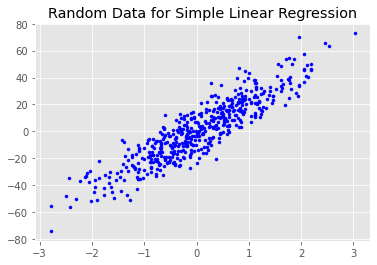

In [3]:
plt.scatter(X,y, marker='.', color='b')
plt.title('Random Data for Simple Linear Regression')

### 2.3 Modelling and Evaluating a Simple Linear Regression

In [4]:
# build a simple linear regression model
from sklearn.linear_model import LinearRegression

SLR = LinearRegression()
SLR.fit(X,y)
b_1 = SLR.coef_
b_0 = SLR.intercept_

# obtain coefficients
print ('Coefficient %.4f' % b_1)
print ('Intercept %.4f' % b_0)

Coefficient 21.5485
Intercept 0.0880


Text(0.5, 1.0, 'Simple Linear Regression Model')

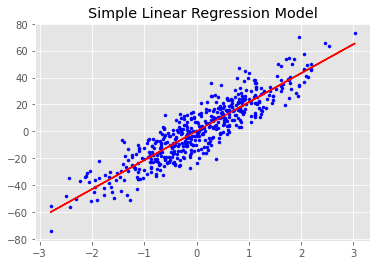

In [5]:
# visualize SLR model on dataset
plt.scatter(X, y, marker='.', color='b')
plt.plot(X, b_1 * X + b_0, '-r')
plt.title('Simple Linear Regression Model')

In [6]:
#evaluation
import numpy as np

y_hat = SLR.predict(X)

print("R-squared %.4f" %SLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

R-squared 0.8222
Mean Absolute Error (MAE): 7.9577
Mean Squared Error (MSE): 98.0931
Root Mean Squared Error (RMSE): 9.9042


### 2.4 SLR with a Negative Linear Relationship

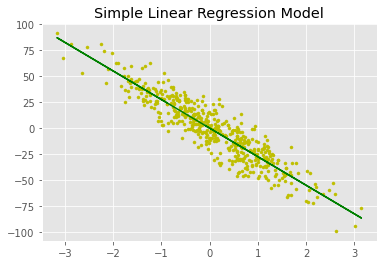

Intercept 0.1387
Coefficient -27.3854
R-squared 0.8396
Mean Absolute Error (MAE): 9.6632
Mean Squared Error (MSE): 144.9082
Root Mean Squared Error (RMSE): 12.0378


In [7]:
# SLR with negative linear relation
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=1, noise=12, random_state=12)
X = X*-1
neg_SLR = LinearRegression()
neg_SLR.fit(X,y)
y_hat = neg_SLR.predict(X)
b_1 = neg_SLR.coef_
b_0 = neg_SLR.intercept_
plt.scatter(X, y, marker='.', color='y')
plt.plot(X, b_1 * X + b_0, '-g')
plt.title('Simple Linear Regression Model')
plt.show()
print ('Intercept %.4f' % b_0)
print ('Coefficient %.4f' % b_1)
print("R-squared %.4f" %neg_SLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))